In [1]:
import dask.bag as db

### Reference : https://github.com/jdorfman/awesome-json-datasets

In [2]:
country_bag = db.from_url('http://api.worldbank.org/countries/IND/indicators/NY.GDP.MKTP.CD?per_page=5000&format=json')

In [3]:
country_bag.take(1)

(b'[{"page":1,"pages":1,"per_page":5000,"total":63,"sourceid":"2","lastupdated":"2023-10-26"},[{"indicator":{"id":"NY.GDP.MKTP.CD","value":"GDP (current US$)"},"country":{"id":"IN","value":"India"},"countryiso3code":"IND","date":"2022","value":3385089881935.39,"unit":"","obs_status":"","decimal":0},{"indicator":{"id":"NY.GDP.MKTP.CD","value":"GDP (current US$)"},"country":{"id":"IN","value":"India"},"countryiso3code":"IND","date":"2021","value":3150306834279.65,"unit":"","obs_status":"","decimal":0},{"indicator":{"id":"NY.GDP.MKTP.CD","value":"GDP (current US$)"},"country":{"id":"IN","value":"India"},"countryiso3code":"IND","date":"2020","value":2671595389575.7,"unit":"","obs_status":"","decimal":0},{"indicator":{"id":"NY.GDP.MKTP.CD","value":"GDP (current US$)"},"country":{"id":"IN","value":"India"},"countryiso3code":"IND","date":"2019","value":2835606242052.48,"unit":"","obs_status":"","decimal":0},{"indicator":{"id":"NY.GDP.MKTP.CD","value":"GDP (current US$)"},"country":{"id":"IN",

In [4]:
import json
json_bag = country_bag.map(json.loads)

In [5]:
json_bag.take(1)


([{'page': 1,
   'pages': 1,
   'per_page': 5000,
   'total': 63,
   'sourceid': '2',
   'lastupdated': '2023-10-26'},
  [{'indicator': {'id': 'NY.GDP.MKTP.CD', 'value': 'GDP (current US$)'},
    'country': {'id': 'IN', 'value': 'India'},
    'countryiso3code': 'IND',
    'date': '2022',
    'value': 3385089881935.39,
    'unit': '',
    'obs_status': '',
    'decimal': 0},
   {'indicator': {'id': 'NY.GDP.MKTP.CD', 'value': 'GDP (current US$)'},
    'country': {'id': 'IN', 'value': 'India'},
    'countryiso3code': 'IND',
    'date': '2021',
    'value': 3150306834279.65,
    'unit': '',
    'obs_status': '',
    'decimal': 0},
   {'indicator': {'id': 'NY.GDP.MKTP.CD', 'value': 'GDP (current US$)'},
    'country': {'id': 'IN', 'value': 'India'},
    'countryiso3code': 'IND',
    'date': '2020',
    'value': 2671595389575.7,
    'unit': '',
    'obs_status': '',
    'decimal': 0},
   {'indicator': {'id': 'NY.GDP.MKTP.CD', 'value': 'GDP (current US$)'},
    'country': {'id': 'IN', 'value'

In [6]:
len(json_bag.compute())

1

In [7]:
url_prefix = 'http://api.worldbank.org/countries/'
url_suffix = '/indicators/NY.GDP.MKTP.CD?per_page=5000&format=json'

country_codes = ['IN', 'US', 'GBR', 'CN', 'DK',
                'SE', 'SG', 'CA', 'RU', 'FR',
                'JP', 'DE', 'IT']

In [8]:
url_lists = []
for code in country_codes:
    full_url = url_prefix + code + url_suffix
    url_lists.append(full_url)


In [9]:
print(url_lists)

['http://api.worldbank.org/countries/IN/indicators/NY.GDP.MKTP.CD?per_page=5000&format=json', 'http://api.worldbank.org/countries/US/indicators/NY.GDP.MKTP.CD?per_page=5000&format=json', 'http://api.worldbank.org/countries/GBR/indicators/NY.GDP.MKTP.CD?per_page=5000&format=json', 'http://api.worldbank.org/countries/CN/indicators/NY.GDP.MKTP.CD?per_page=5000&format=json', 'http://api.worldbank.org/countries/DK/indicators/NY.GDP.MKTP.CD?per_page=5000&format=json', 'http://api.worldbank.org/countries/SE/indicators/NY.GDP.MKTP.CD?per_page=5000&format=json', 'http://api.worldbank.org/countries/SG/indicators/NY.GDP.MKTP.CD?per_page=5000&format=json', 'http://api.worldbank.org/countries/CA/indicators/NY.GDP.MKTP.CD?per_page=5000&format=json', 'http://api.worldbank.org/countries/RU/indicators/NY.GDP.MKTP.CD?per_page=5000&format=json', 'http://api.worldbank.org/countries/FR/indicators/NY.GDP.MKTP.CD?per_page=5000&format=json', 'http://api.worldbank.org/countries/JP/indicators/NY.GDP.MKTP.CD?per

In [10]:
all_countries = db.from_url(url_lists)

In [11]:
all_countries.npartitions

13

In [12]:
json_countries = all_countries.map(json.loads)

In [13]:
json_countries.take(2,npartitions=2)

([{'page': 1,
   'pages': 1,
   'per_page': 5000,
   'total': 63,
   'sourceid': '2',
   'lastupdated': '2023-10-26'},
  [{'indicator': {'id': 'NY.GDP.MKTP.CD', 'value': 'GDP (current US$)'},
    'country': {'id': 'IN', 'value': 'India'},
    'countryiso3code': 'IND',
    'date': '2022',
    'value': 3385089881935.39,
    'unit': '',
    'obs_status': '',
    'decimal': 0},
   {'indicator': {'id': 'NY.GDP.MKTP.CD', 'value': 'GDP (current US$)'},
    'country': {'id': 'IN', 'value': 'India'},
    'countryiso3code': 'IND',
    'date': '2021',
    'value': 3150306834279.65,
    'unit': '',
    'obs_status': '',
    'decimal': 0},
   {'indicator': {'id': 'NY.GDP.MKTP.CD', 'value': 'GDP (current US$)'},
    'country': {'id': 'IN', 'value': 'India'},
    'countryiso3code': 'IND',
    'date': '2020',
    'value': 2671595389575.7,
    'unit': '',
    'obs_status': '',
    'decimal': 0},
   {'indicator': {'id': 'NY.GDP.MKTP.CD', 'value': 'GDP (current US$)'},
    'country': {'id': 'IN', 'value'

In [14]:
country_names = json_countries.pluck('country')

In [15]:
# fIXME list indices must be integers or slices, not str
# country_names.take(1)

In [16]:
def correct_json(json_str):
    json_format = json.loads(json_str)
    return json_format[1]

proper_json = all_countries.map(correct_json).flatten()

In [17]:
proper_json.take(10)

({'indicator': {'id': 'NY.GDP.MKTP.CD', 'value': 'GDP (current US$)'},
  'country': {'id': 'IN', 'value': 'India'},
  'countryiso3code': 'IND',
  'date': '2022',
  'value': 3385089881935.39,
  'unit': '',
  'obs_status': '',
  'decimal': 0},
 {'indicator': {'id': 'NY.GDP.MKTP.CD', 'value': 'GDP (current US$)'},
  'country': {'id': 'IN', 'value': 'India'},
  'countryiso3code': 'IND',
  'date': '2021',
  'value': 3150306834279.65,
  'unit': '',
  'obs_status': '',
  'decimal': 0},
 {'indicator': {'id': 'NY.GDP.MKTP.CD', 'value': 'GDP (current US$)'},
  'country': {'id': 'IN', 'value': 'India'},
  'countryiso3code': 'IND',
  'date': '2020',
  'value': 2671595389575.7,
  'unit': '',
  'obs_status': '',
  'decimal': 0},
 {'indicator': {'id': 'NY.GDP.MKTP.CD', 'value': 'GDP (current US$)'},
  'country': {'id': 'IN', 'value': 'India'},
  'countryiso3code': 'IND',
  'date': '2019',
  'value': 2835606242052.48,
  'unit': '',
  'obs_status': '',
  'decimal': 0},
 {'indicator': {'id': 'NY.GDP.MKT

In [18]:
country_names = proper_json.pluck('country', default=None)

In [19]:
country_names.take(4)

({'id': 'IN', 'value': 'India'},
 {'id': 'IN', 'value': 'India'},
 {'id': 'IN', 'value': 'India'},
 {'id': 'IN', 'value': 'India'})

In [20]:
country_names = proper_json.pluck('country',
                                  default=None).pluck('value')

In [21]:
country_names.distinct().compute()

['India',
 'United States',
 'United Kingdom',
 'China',
 'Denmark',
 'Sweden',
 'Singapore',
 'Canada',
 'Russian Federation',
 'France',
 'Japan',
 'Germany',
 'Italy']

In [22]:
country_list = country_names.distinct()

In [23]:
proper_json.npartitions

13

In [24]:
def combine_country(x):
    total = 0
    for yearly_gdp in x:
        if yearly_gdp['value'] is not None:
            total += float(yearly_gdp['value'])
    return total
    
test = proper_json.map_partitions(combine_country).compute()
test

(46710181454283.96,
 517469153704000.0,
 82801128960568.06,
 192926122139788.66,
 9884262575496.654,
 16060768029921.96,
 6716103035610.965,
 46156168686788.516,
 36181935029446.734,
 82212977664864.67,
 183007122467977.4,
 113133561573660.19,
 65167230457044.445)

In [25]:
# important columns
def imp_columns(my_item):
    if my_item['value'] is None:
        return None
    else:
        result_dict = {
            'country': my_item['country']['value'],
            'gdp': float(my_item['value']),
            'year': int(my_item['date'])
        }
        return result_dict

filtered_bag = proper_json.map(imp_columns)
                

In [34]:
filtered_bag.take(50)

({'country': 'India', 'gdp': 3385089881935.39, 'year': 2022},
 {'country': 'India', 'gdp': 3150306834279.65, 'year': 2021},
 {'country': 'India', 'gdp': 2671595389575.7, 'year': 2020},
 {'country': 'India', 'gdp': 2835606242052.48, 'year': 2019},
 {'country': 'India', 'gdp': 2702929639861.5, 'year': 2018},
 {'country': 'India', 'gdp': 2651474263257.15, 'year': 2017},
 {'country': 'India', 'gdp': 2294796889945.04, 'year': 2016},
 {'country': 'India', 'gdp': 2103588347241.77, 'year': 2015},
 {'country': 'India', 'gdp': 2039126469963.35, 'year': 2014},
 {'country': 'India', 'gdp': 1856721494834.64, 'year': 2013},
 {'country': 'India', 'gdp': 1827637579584.79, 'year': 2012},
 {'country': 'India', 'gdp': 1823051829894.55, 'year': 2011},
 {'country': 'India', 'gdp': 1675615502766.2, 'year': 2010},
 {'country': 'India', 'gdp': 1341888016988.57, 'year': 2009},
 {'country': 'India', 'gdp': 1198895147694.77, 'year': 2008},
 {'country': 'India', 'gdp': 1216736448906.29, 'year': 2007},
 {'country'

In [27]:
filtered_bag = filtered_bag.filter(lambda x: x is not None)

In [28]:
filtered_bag.take(10)

({'country': 'India', 'gdp': 3385089881935.39, 'year': 2022},
 {'country': 'India', 'gdp': 3150306834279.65, 'year': 2021},
 {'country': 'India', 'gdp': 2671595389575.7, 'year': 2020},
 {'country': 'India', 'gdp': 2835606242052.48, 'year': 2019},
 {'country': 'India', 'gdp': 2702929639861.5, 'year': 2018},
 {'country': 'India', 'gdp': 2651474263257.15, 'year': 2017},
 {'country': 'India', 'gdp': 2294796889945.04, 'year': 2016},
 {'country': 'India', 'gdp': 2103588347241.77, 'year': 2015},
 {'country': 'India', 'gdp': 2039126469963.35, 'year': 2014},
 {'country': 'India', 'gdp': 1856721494834.64, 'year': 2013})

In [29]:
gdp_data = filtered_bag.to_dataframe().compute()

In [30]:
# %pip install seaborn

Note: you may need to restart the kernel to use updated packages.


In [31]:
import seaborn as sns

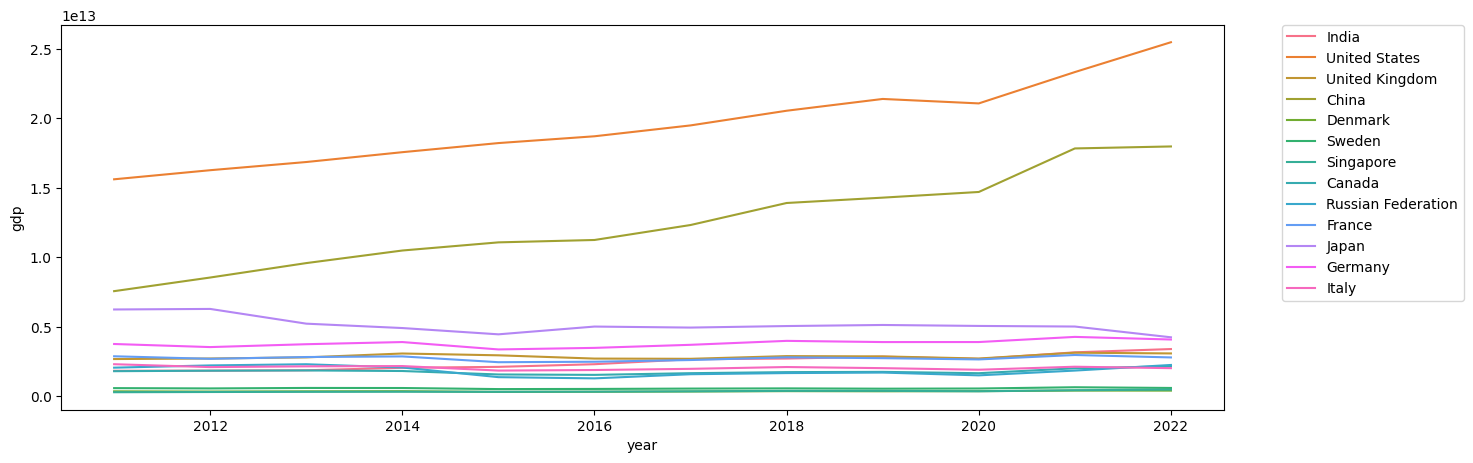

In [32]:
import matplotlib.pyplot as plt
plt.subplots(figsize = (15,5))
sns.lineplot(data=gdp_data[gdp_data['year']>2010], x='year', y='gdp',
            hue='country')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
